In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Datasets:

This data was found in kaggle datasets (https://www.kaggle.com/competitions/playground-series-s3e12/overview). This dataset provide feature to predict kidney stone, 0 as negative and 1 as positive. The features are:

* `gravity` = the density of the urine relative to water
* `ph` = the negative logarithm of the hydrogen ion
* `osmo` = the concentration of molecules in solution
* `cond` = the consentration of charged ions in solution
* `urea` = urea concentration in millimoles per liter
* `calc` = calcium concentrarion in millimoles per liter


In [2]:
train = pd.read_csv('train.csv')
train.head(5)


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [3]:
print('Size of train: ', train.shape)


Size of train:  (414, 8)


### Check for Missing Values:

There is no missing values in `train` and `test` datasets.

In [4]:
train.isnull().sum()


id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

### Eliminate 'id' Column:

Remove `id` column from `train` datasets.

In [5]:
train.drop('id', axis=1, inplace=True)
train.head(5)


,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


## EDA:

### Correlation:

Correlation table between between each variable. The pairs of variable with strong positive correlations are (`urea`,`osmo`), (`cond`,`osmo`) and (`gravity`,`osmo`). The `ph` has negative correlation between any other variables. The rest of variables are moderatelly positively correlated.

It is recomended to avoid strong correlation between features because it will increase the risk of errors. Thus, it might be the right idea to remove `osmo` column because it has strong correlation between other features.

In [6]:
corr_matrix = train.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')


,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


### Pair Plots:

For each graph, there is no distinct separation between posistive (1) and negative (0) values in target. The diagonal graphs (KDE) shows some assymetry, such as `calc` has skewness of 1.118533 and `ph` has skewness of 0.971308 which means that both variables are positively skewed.

To fix it, need to preform some transformation on the dataset.

/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

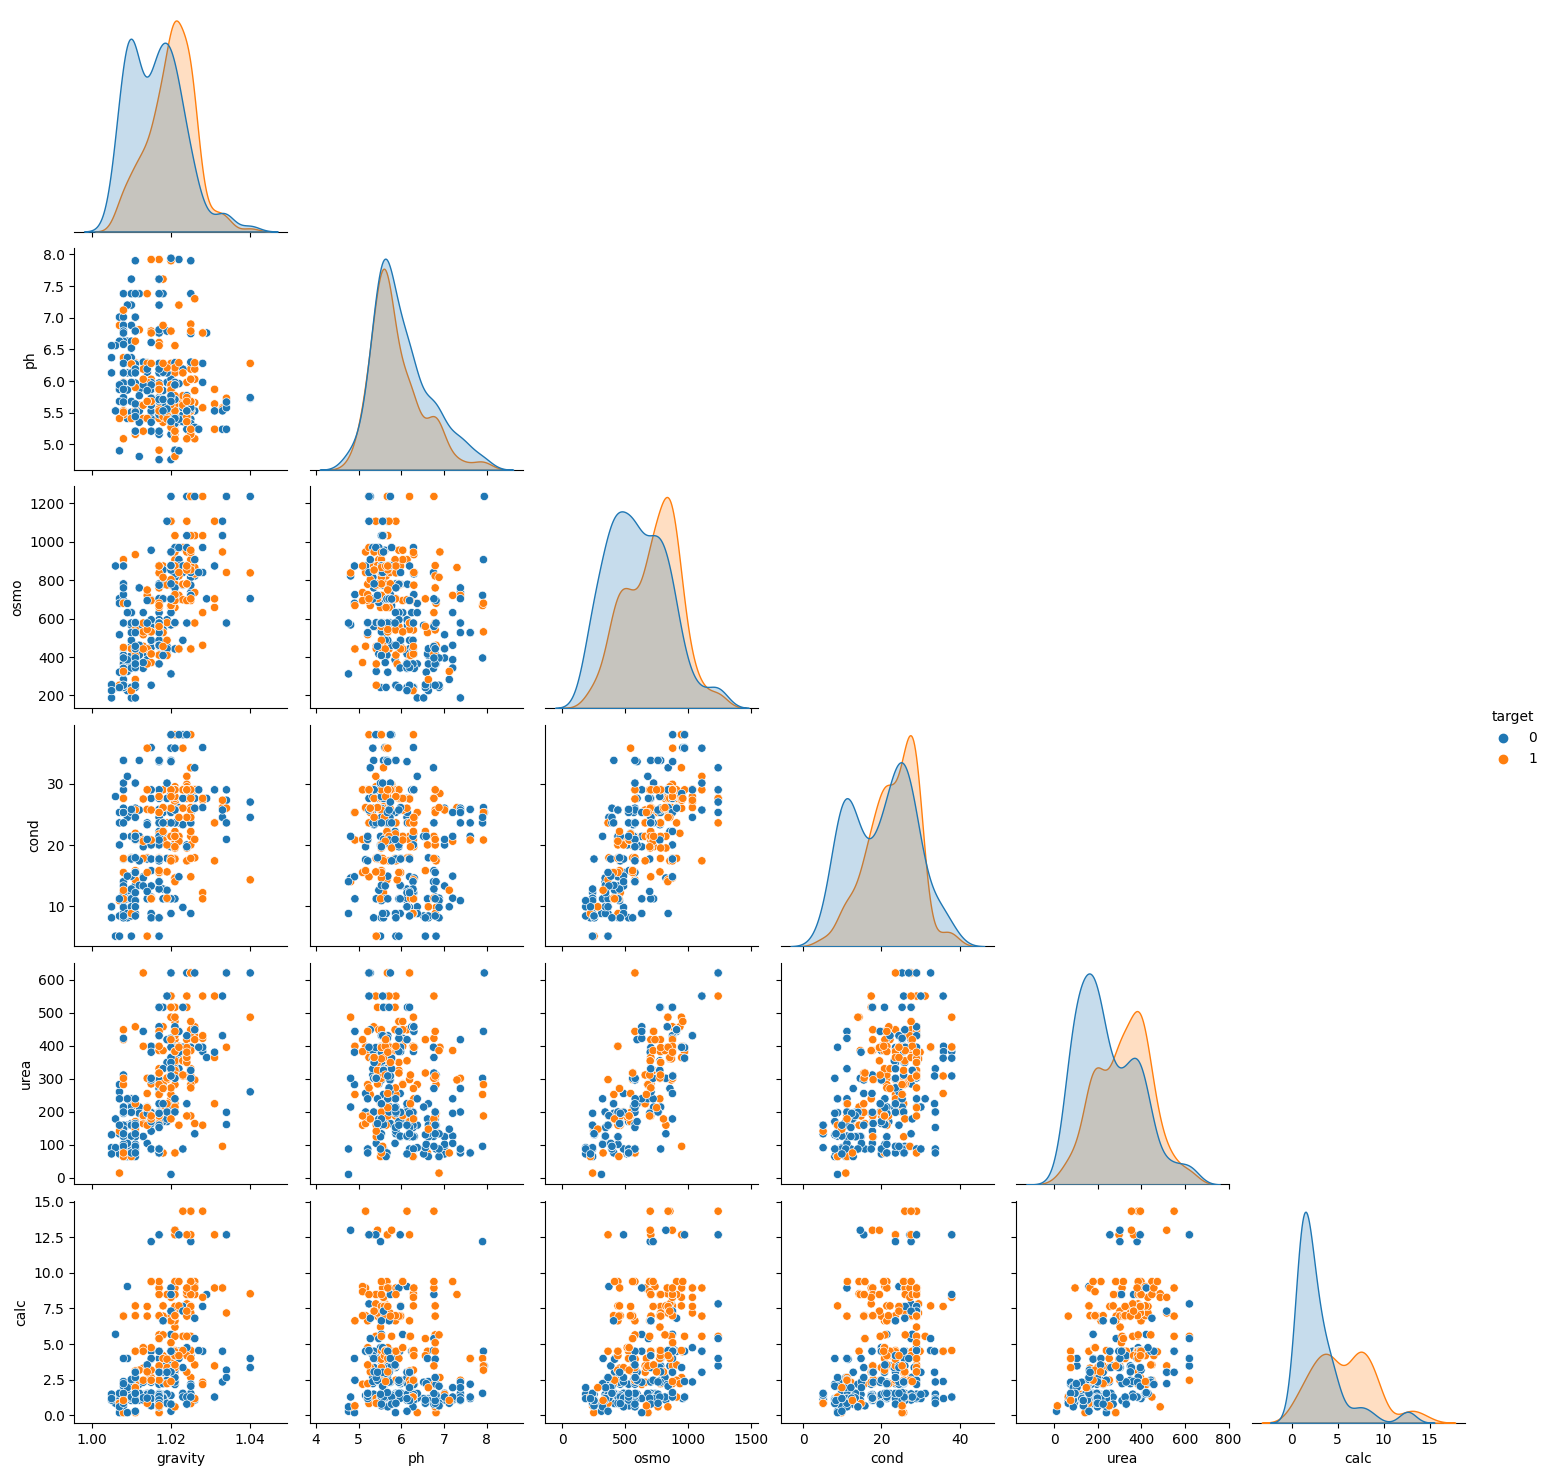

In [7]:
sns.pairplot(train, hue="target", corner=True, diag_kind='kde')


/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

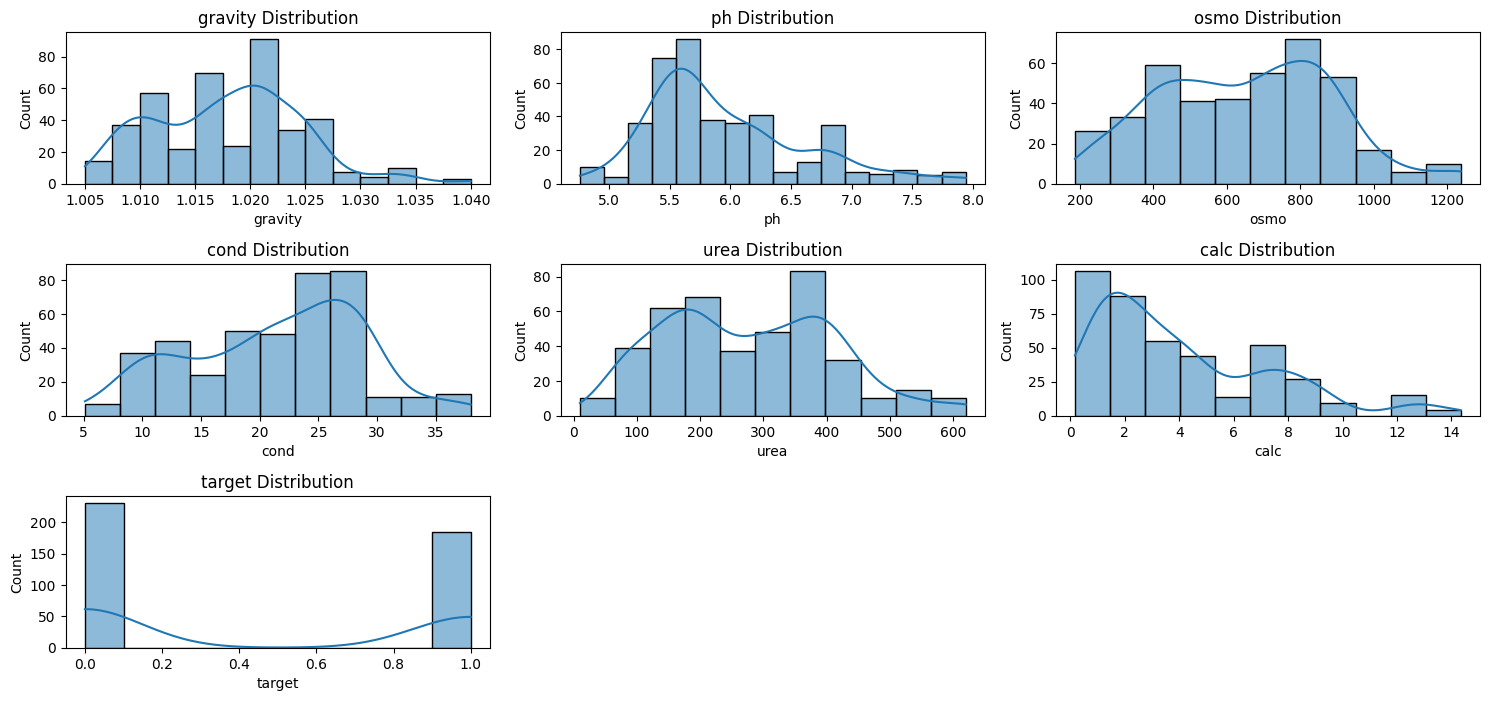

In [8]:
plt.figure(figsize=(15,9))
for i,col in enumerate(list(train.columns),1):
    plt.subplot(4,3,i)
    plt.title(f'{col} Distribution')
    sns.histplot(train[col], kde=True)
    plt.tight_layout()


In [9]:
train.skew().sort_values()


cond      -0.212009
osmo       0.147395
target     0.224421
gravity    0.291010
urea       0.329107
ph         0.971308
calc       1.118533
dtype: float64

### Box Plot:

This graphs shows that `ph` and `gravity` has some outliers. 

To fix it, the outliers needs to be removed.

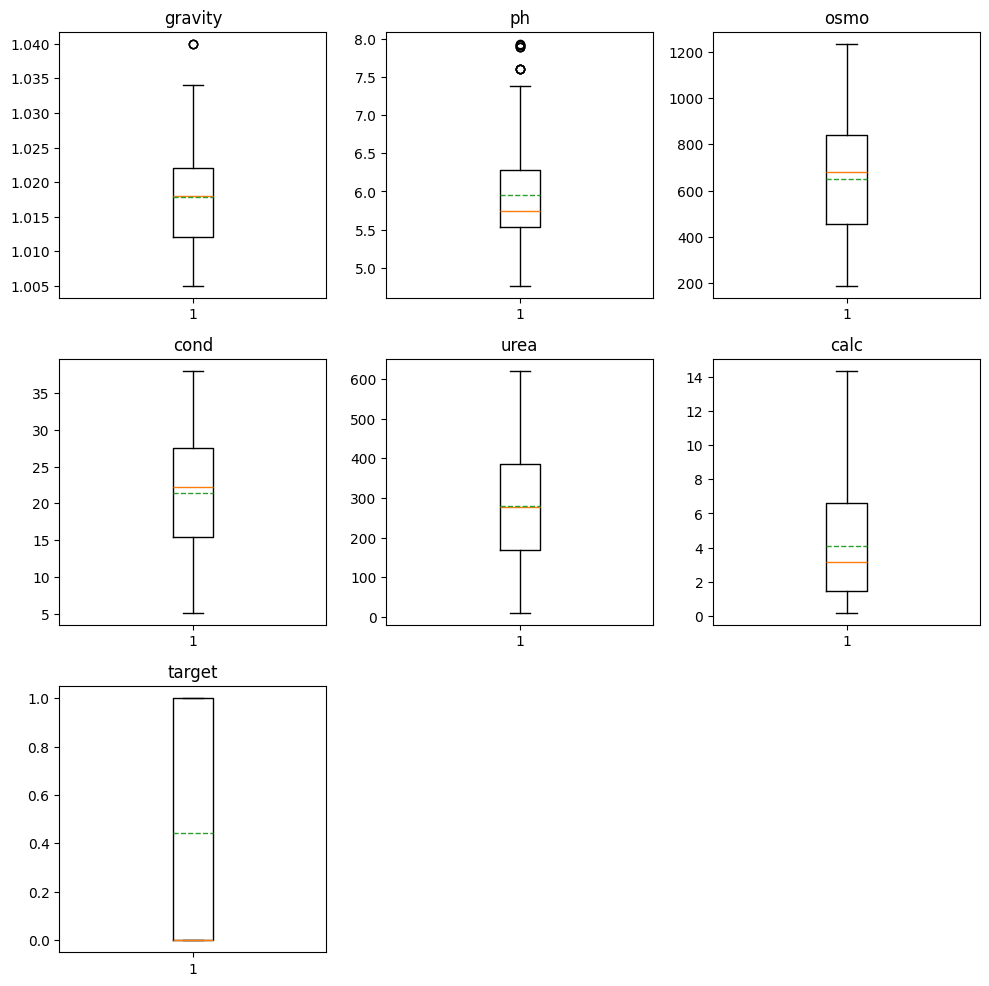

In [10]:
plt.figure(figsize=(10,13))
for i,col in enumerate(list(train.columns),1):
    plt.subplot(4,3,i)
    plt.title(f'{col}')
    #sns.histplot(train[col], kde=True)
    plt.boxplot(x=train[col], showmeans=True, meanline=True)
    plt.tight_layout()


## Model:

### Logistic Regression:

The logistic Regression is used in this section. First, need to split in `train` dataset to do analysis of the model. The `train` dataset is not modified because it will be interesting to see model improvement with modefied dataset.

Confusion matrix shows how many datapoints wore misclassified by the data. For Logistic Regression, the diagonal shows the correct classifications, and it suposed to be high values compares to other cells. However, this model has high value of misclassified positive kidney stone result as a negative.

The ROC figure provides curve of the true positive rate against the false positive rate. The AUC = 0.725, this means that prediction are roughly 73% accurate.

The overall model accuracy score is 63.86% which is bad, but it can be improved.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
from sklearn import metrics


In [12]:
#split dataset
x = train.drop(['target'], axis=1)
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)


In [13]:
#make logistic regression
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

#accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy %: ', round(accuracy*100, 2))


Accuracy %:  63.86


In [14]:
#confusion matrix
metrics.confusion_matrix(y_test, y_pred)


array([[28,  7],
       [23, 25]])

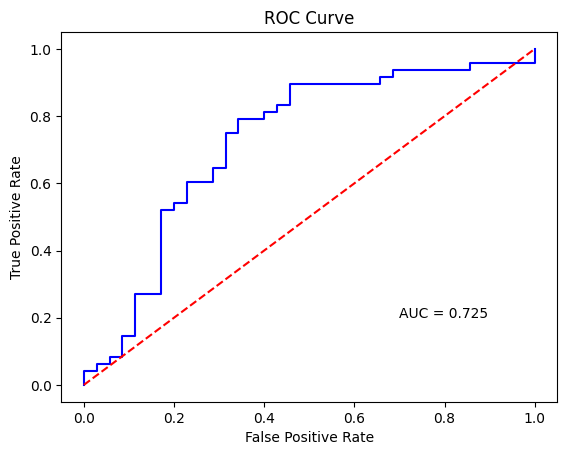

In [15]:
#ROC curve
y_pred_prob = LogReg.predict_proba(x_test)
roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
fpr, tpr, th = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, color = "blue")
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), color = "red", linestyle = "dashed")
plt.text(x = 0.7, y = 0.2, s = "AUC = " + str(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


### Logistic Regression with Feature Enginering:

#### Treating High Correlation:

Removing column `osmo` because it has high correlation between other variables.

In [16]:
#remove 'osmo' column
train_new = train.copy()
train_new.drop('osmo', axis=1, inplace=True)
train_new.head(5)


,gravity,ph,cond,urea,calc,target
0,1.013,6.19,14.8,124,1.45,0
1,1.025,5.40,23.6,394,4.18,0
2,1.009,6.13,24.5,159,9.04,0
3,1.021,4.91,20.8,398,6.63,1
4,1.021,5.53,17.8,385,2.21,1


#### Treating Outliers:

The columns `gravity` and `ph` have ouliers. Thus, those ouliers will be removed since it is only 15 (about 3.6% of the whole data) of those data points. To find outliers, the interquartile range (IQR) is used. The IQR will calculate outliers that fall bellow Q1 or above Q3 where Q1 is the 25th precentile and Q3 is 75th precentile. After finding outliers, they are will be eliminated from dataset.

In [17]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers


# number of outliers
for i in train_new.columns:
    outliers = find_outliers_IQR(train_new[i])
    print((i, str(len(outliers))))


('gravity', '3')
('ph', '12')
('cond', '0')
('urea', '0')
('calc', '0')
('target', '0')


In [18]:
indx=[]
#array of indices of outlier values
for i in train_new.columns:
    outliers = find_outliers_IQR(train_new[i])
    outliers_index = np.array(outliers.isnull().index)
    for j in outliers_index:
        indx.append(j)
print(indx)


# drop outliers
train_new = train_new.drop(indx)
print(train_new)


[200, 315, 404, 32, 58, 104, 177, 201, 233, 255, 323, 362, 370, 377, 388]
     gravity    ph  cond  urea  calc  target
0      1.013  6.19  14.8   124  1.45       0
1      1.025  5.40  23.6   394  4.18       0
2      1.009  6.13  24.5   159  9.04       0
3      1.021  4.91  20.8   398  6.63       1
4      1.021  5.53  17.8   385  2.21       1
..       ...   ...   ...   ...   ...     ...
409    1.011  5.21  21.4    75  1.53       0
410    1.024  5.53  19.7   224  0.77       0
411    1.018  6.28  22.2   270  7.68       1
412    1.008  7.12  12.6    75  1.03       1
413    1.011  6.13   9.9   159  0.27       0

[399 rows x 6 columns]


#### Transformation:

The transformation of dataset needs to be preformed to eliminate skewness and keep the original distribution. The Standard Scaler is used to change features where mean is 0 and standard deviation in 1. The values are both positive and negative  centered around 0.

In [19]:
#transformation
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
train_new[['gravity','ph','cond','urea','calc']] = scale.fit_transform(train_new[['gravity','ph','cond','urea','calc']])
train_new


,gravity,ph,cond,urea,calc,target
0,-0.732331,0.510039,-0.861954,-1.161442,-0.825922,0
1,1.120946,-0.882507,0.294211,0.857732,0.019441,0
2,-1.350090,0.404276,0.412455,-0.899697,1.524372,0
3,0.503187,-1.746238,-0.073660,0.887645,0.778100,1
4,0.503187,-0.653354,-0.467807,0.790426,-0.590583,1
...,...,...,...,...,...,...
409,-1.041210,-1.217423,0.005170,-1.527884,-0.801149,0
410,0.966506,-0.653354,-0.218180,-0.413600,-1.036488,0
411,0.039868,0.668684,0.110276,-0.069592,1.103239,1
412,-1.504530,2.149366,-1.150996,-1.527884,-0.955977,1


### Logistic Regression After Feature Engenering:

After performing Feature Enginiring on the train dataset, it gave sligtly improvement. The accuracy of this model is 77.5%, which improved by 13.64%. The confusion matrix shows that majority of the points are classified correctly, however Type II Error appeat to be large (but it is still the improvement from previos model). The ROC figure provides AUC value of 0.8269, this is better than previos model's AUC by 0.102.

In [20]:
#split dataset
x = train_new.drop(['target'], axis=1)
y = train_new['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)


In [21]:
#make logistic regression
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)

#accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy %: ', round(accuracy*100, 2))


Accuracy %:  77.5


In [22]:
#confusion matrix
metrics.confusion_matrix(y_test, y_pred)


array([[36,  4],
       [14, 26]])

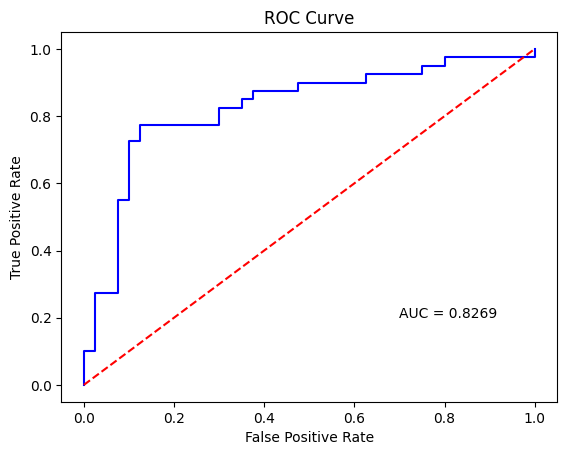

In [23]:
#ROC curve
y_pred_prob = LogReg.predict_proba(x_test)
roc_auc = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 4)
fpr, tpr, th = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, color = "blue")
plt.plot(np.arange(0, 1.1, 0.1), np.arange(0, 1.1, 0.1), color = "red", linestyle = "dashed")
plt.text(x = 0.7, y = 0.2, s = "AUC = " + str(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


## Conclusion:



The Feature Engineering helped to improve model. The accuracy of old model was 63.86% and accuracy of new model is 77.5% which is 13.64% improvement. The AUC of old model is 0.725 and AUC of new model is 0.8269 which is 0.1019 difference. The confusion matrix of the old model has large Type II Error, where almost half of the negative diagnosis for kindney stone was diagnosed as positive (45.1%). And in new model the Type II Error decreased where the negative diagnosis for kindney stone was diagnosed as positive (23%).